In [1]:
# standard imports
import pandas as pd
import numpy as np

# this is to open the dataset/download the keggal dataset
import opendatasets as od
import os

# time imports
from datetime import timedelta, datetime

# visualized your data
import matplotlib.pyplot as plt
import seaborn as sns

# my imports
import wrangle_lugo as wl
import wrangle as w

In [2]:
# od.download("https://www.kaggle.com/datasets/utkarshx27/american-companies-bankruptcy-prediction-dataset")

# get current working directory
# cwd = os.getcwd()

# change the current working directory plus the download file
# os.chdir(cwd+"/american-companies-bankruptcy-prediction-dataset")

# df = pd.read_csv('american_bankruptcy.csv')

# df = wl.get_data()

# df = wl.check_file_exists('american_bankruptcy.csv')

In [3]:
url = 'https://gist.githubusercontent.com/rosendo-lugo/8138692acade48da91cf1c80687f0779/raw/american_bankruptcy.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [6]:
df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [7]:
# set all the columns names to a lowercase
df.columns = df.columns.str.lower()

# replace all the nulls with a zero
df = df.replace(np.nan,0)

# rename columns
df.columns
df = df.rename(columns={'x1':'current_assets', 'x2':'cost_of_goods_sold',
                     'x3':'depreciation_and_amortization','x4':'ebitda',
                     'x5':'inventory','x6':'net_income',
                     'x7':'total_receivables','x8':'market_value ',
                     'x9':'net_sales', 'x10':'total_assets',
                     'x11':'total_long_term_debt','x12':'ebit',
                     'x13':'gross_profit','x14':'total_current_liabilities',
                     'x15':'retained_earnings','x16':'total_revenue ',
                     'x17':'total_liabilities ','x18':'total_operating_expenses'})

In [8]:
df.isnull().value_counts()

company_name  status_label  year   current_assets  cost_of_goods_sold  depreciation_and_amortization  ebitda  inventory  net_income  total_receivables  market_value   net_sales  total_assets  total_long_term_debt  ebit   gross_profit  total_current_liabilities  retained_earnings  total_revenue   total_liabilities   total_operating_expenses
False         False         False  False           False               False                          False   False      False       False              False          False      False         False                 False  False         False                      False              False           False               False                       78682
dtype: int64

In [9]:
# Separate the features (X) and target variable (y) for the test set
# df = df.drop(columns=['company_name','status_label'])

In [10]:
list(df.columns)

['company_name',
 'status_label',
 'year',
 'current_assets',
 'cost_of_goods_sold',
 'depreciation_and_amortization',
 'ebitda',
 'inventory',
 'net_income',
 'total_receivables',
 'market_value ',
 'net_sales',
 'total_assets',
 'total_long_term_debt',
 'ebit',
 'gross_profit',
 'total_current_liabilities',
 'retained_earnings',
 'total_revenue ',
 'total_liabilities ',
 'total_operating_expenses']

In [11]:
num_cols = [s for s in list(df.columns) if s not in ['company_name','status_label']]

year


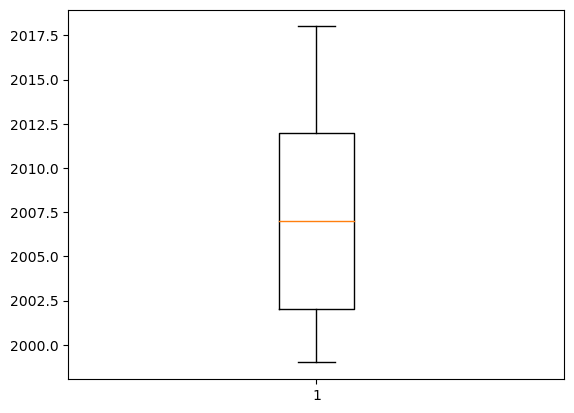

current_assets


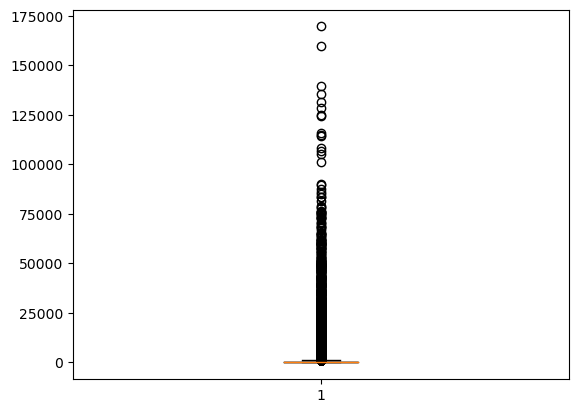

cost_of_goods_sold


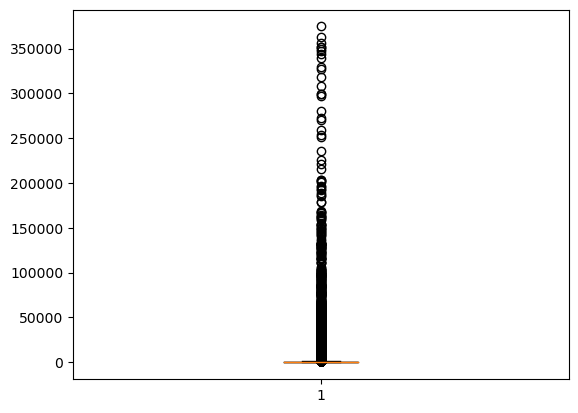

depreciation_and_amortization


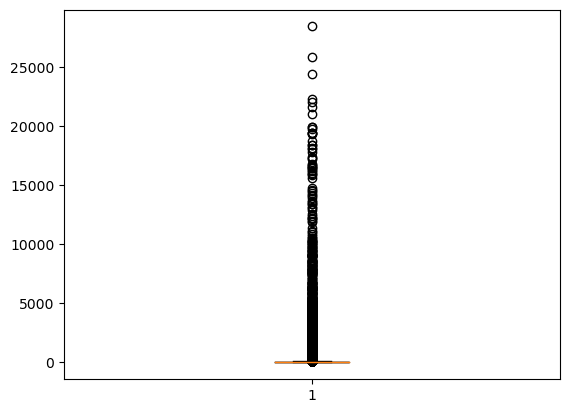

ebitda


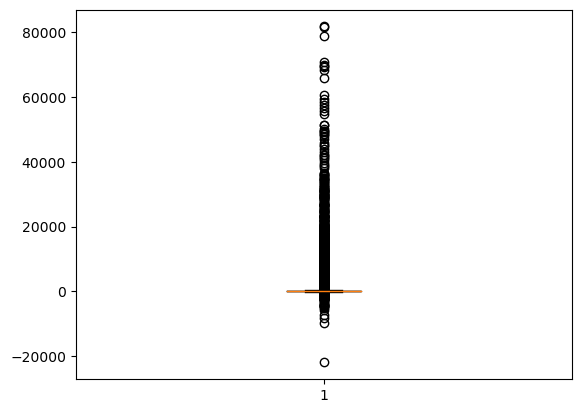

inventory


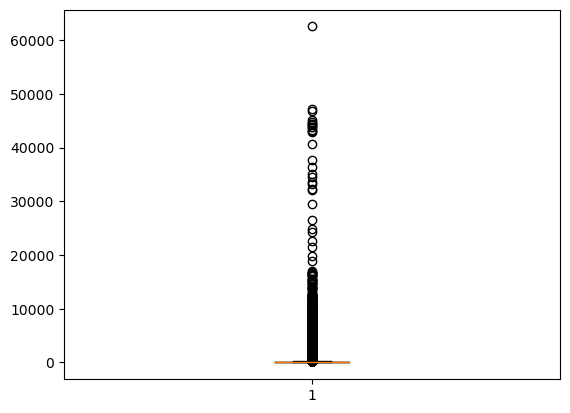

net_income


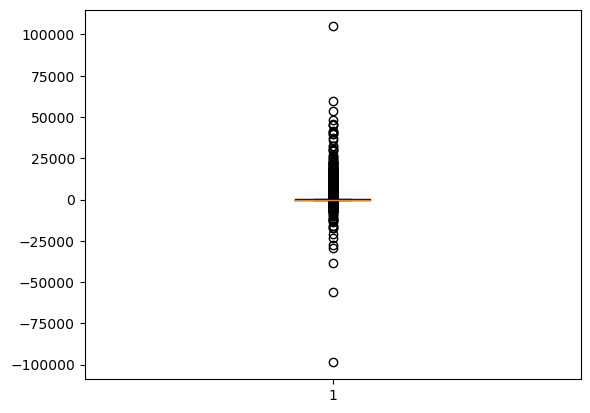

total_receivables


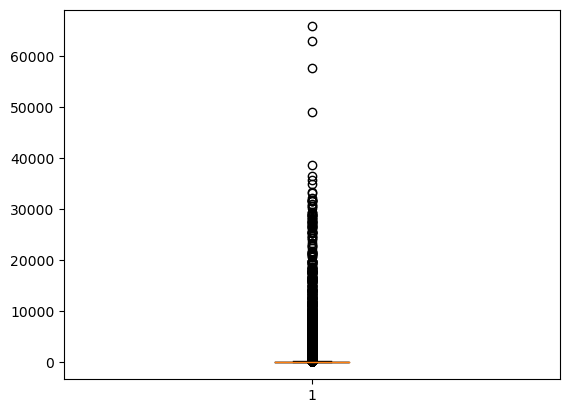

market_value 


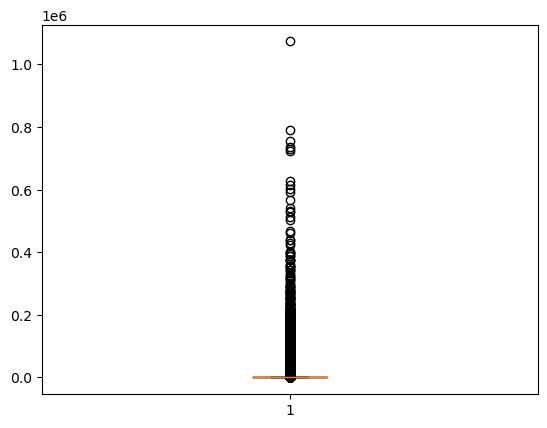

net_sales


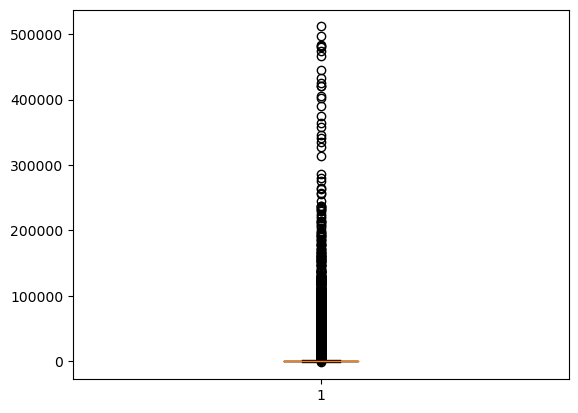

total_assets


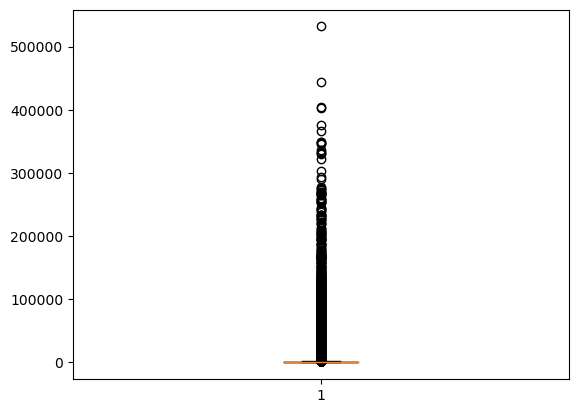

total_long_term_debt


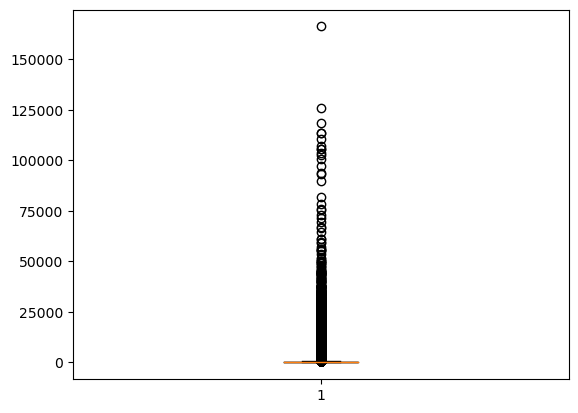

ebit


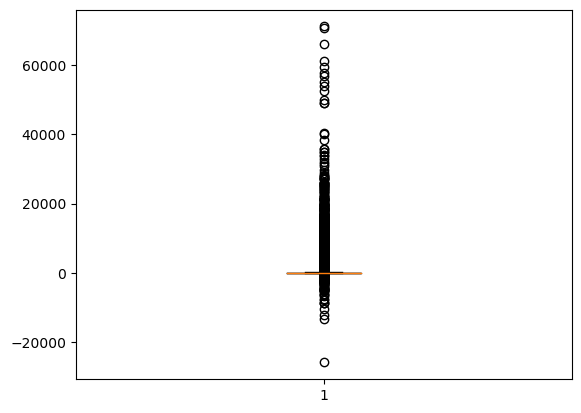

gross_profit


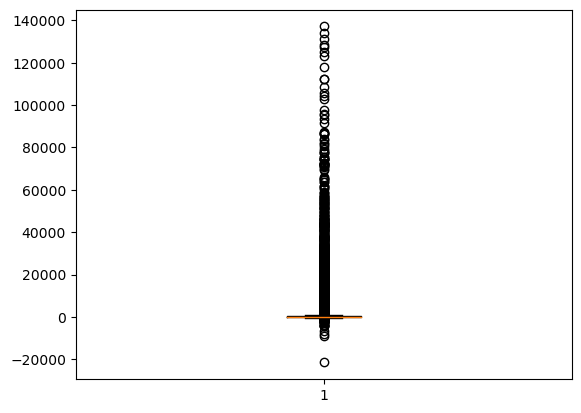

total_current_liabilities


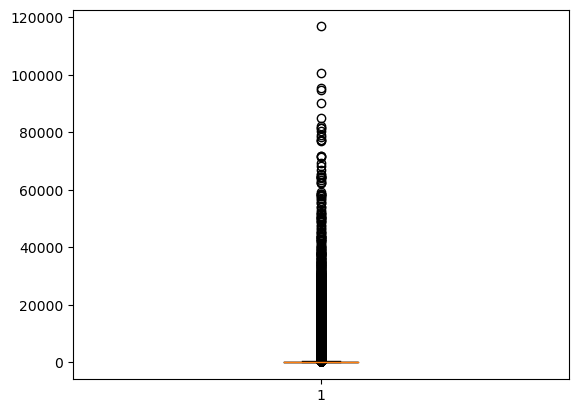

retained_earnings


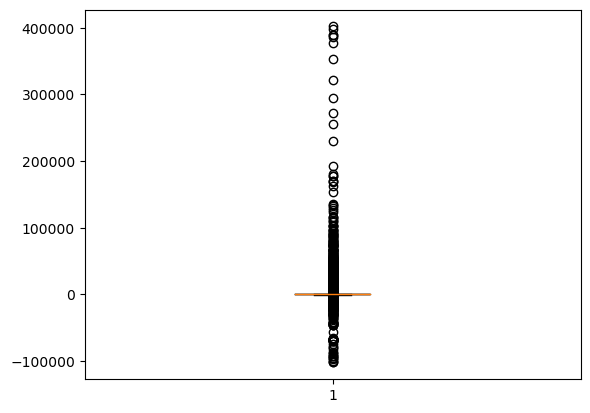

total_revenue 


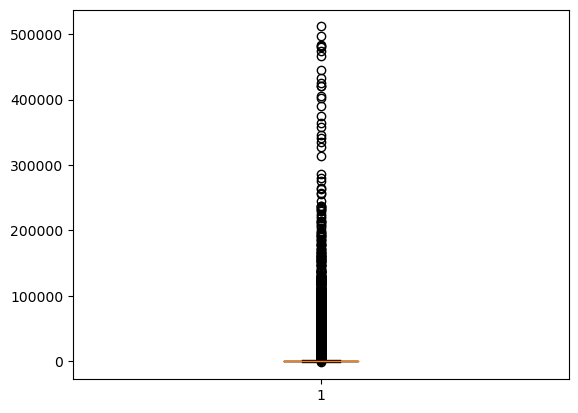

total_liabilities 


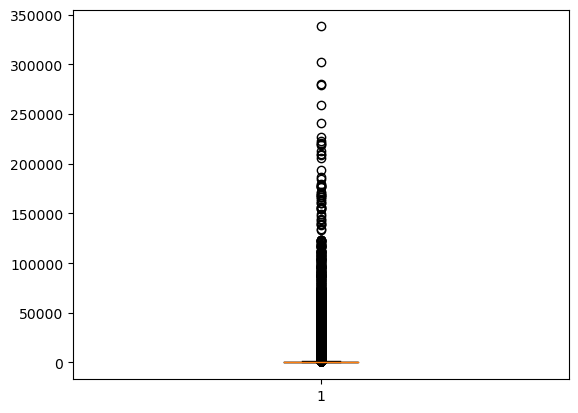

total_operating_expenses


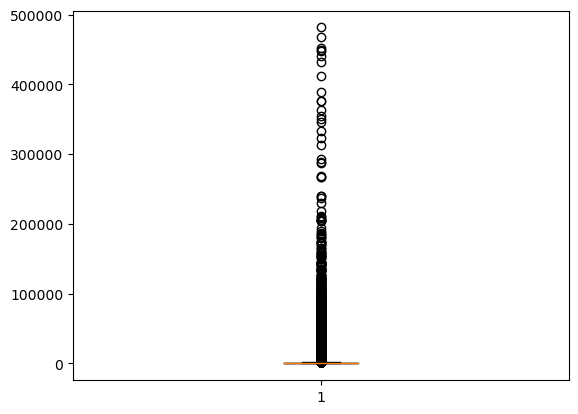

In [12]:
# perform a plot distribution of all the features
for col in num_cols:
    print(col)
    plt.boxplot(df[col])
    plt.show()

year


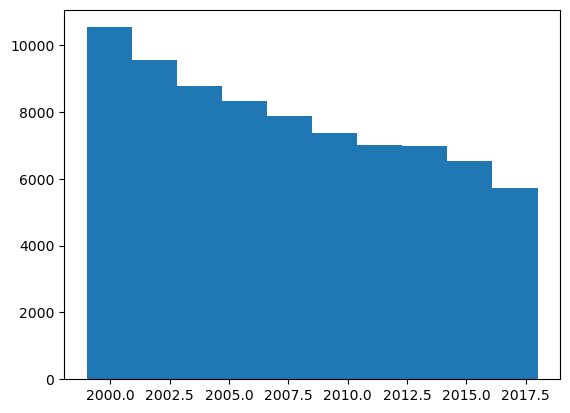

current_assets


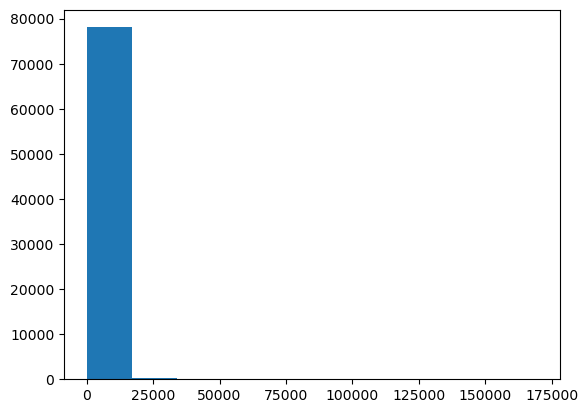

cost_of_goods_sold


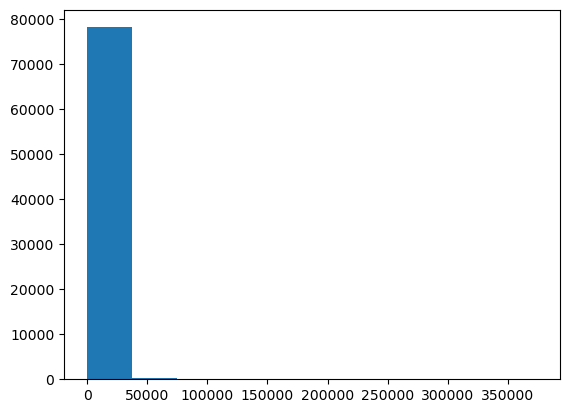

depreciation_and_amortization


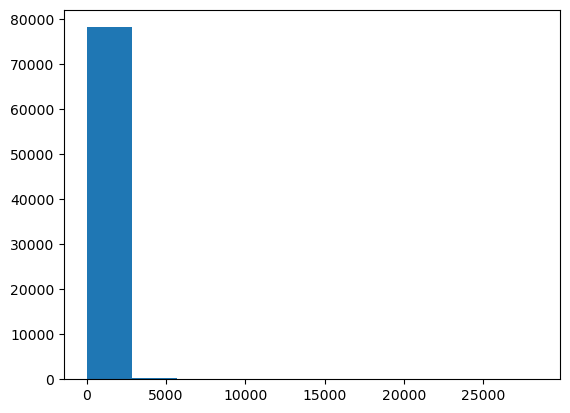

ebitda


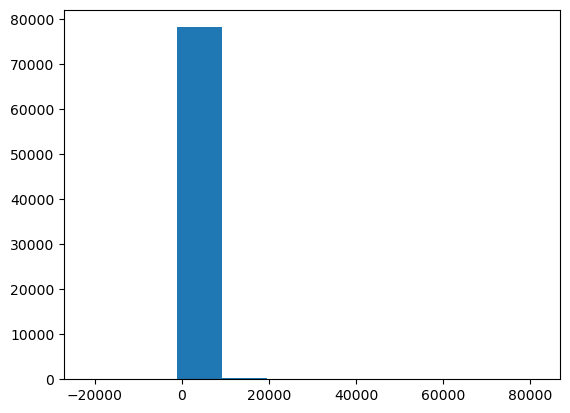

inventory


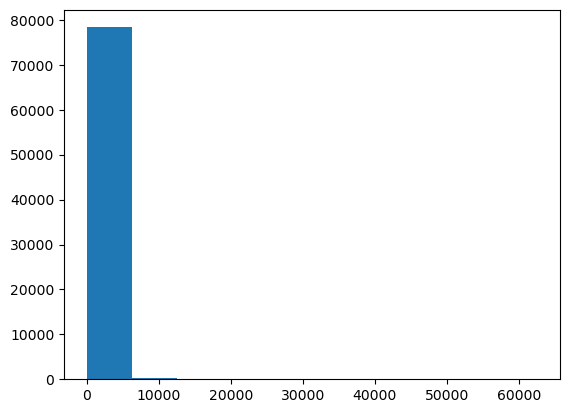

net_income


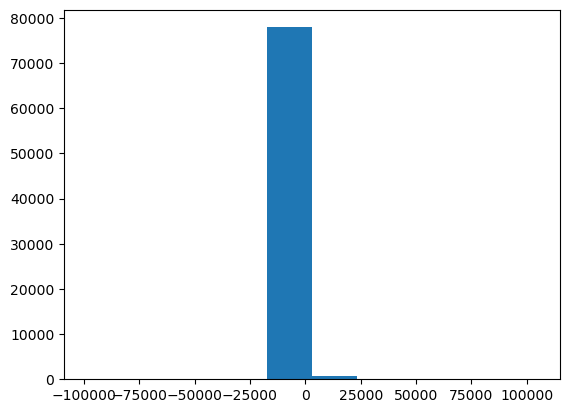

total_receivables


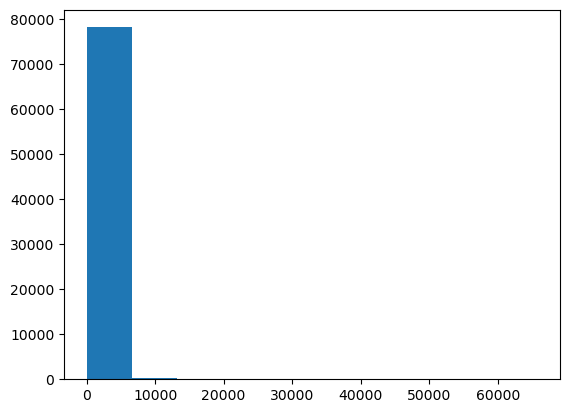

market_value 


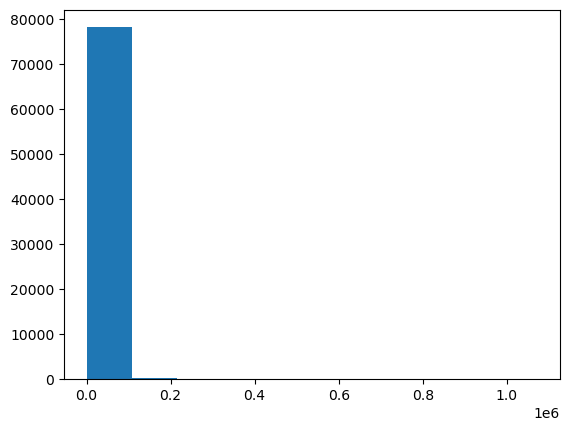

net_sales


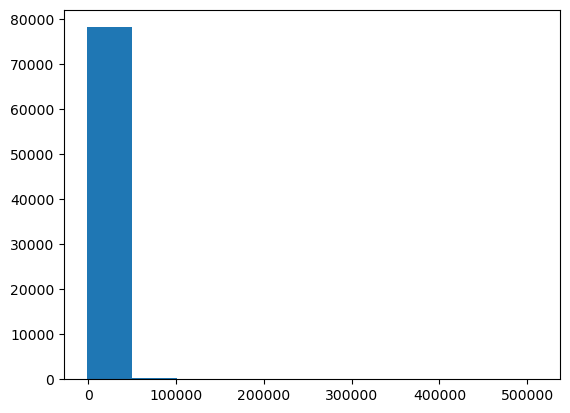

total_assets


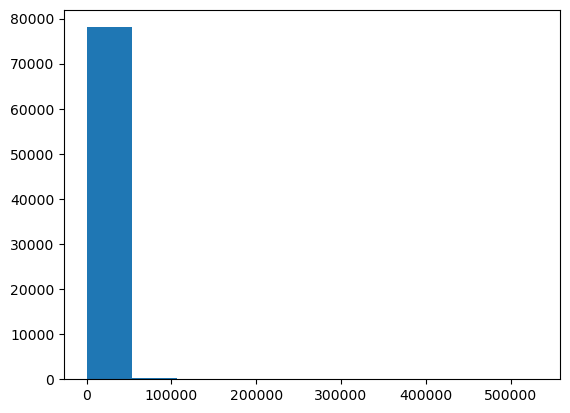

total_long_term_debt


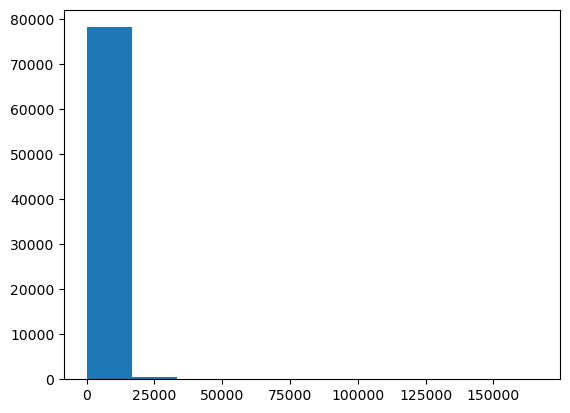

ebit


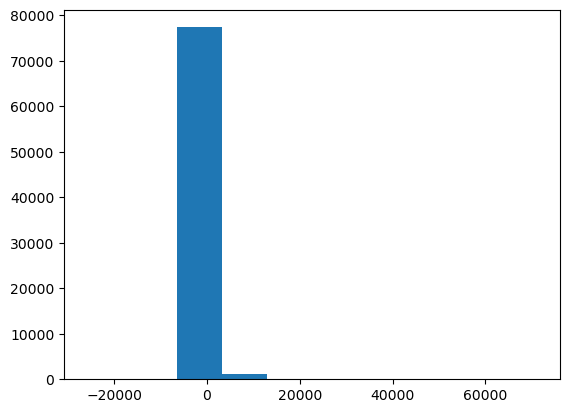

gross_profit


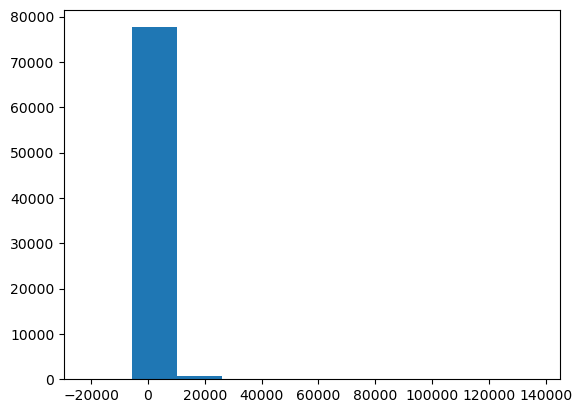

total_current_liabilities


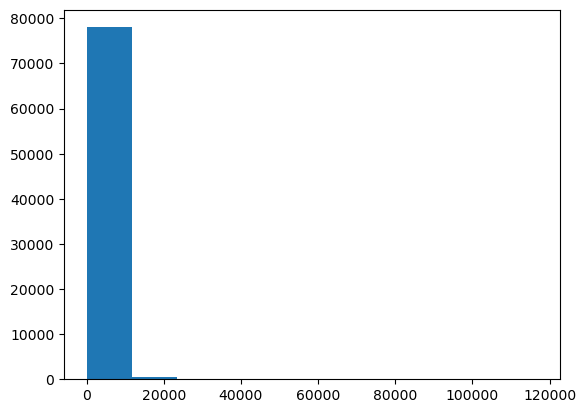

retained_earnings


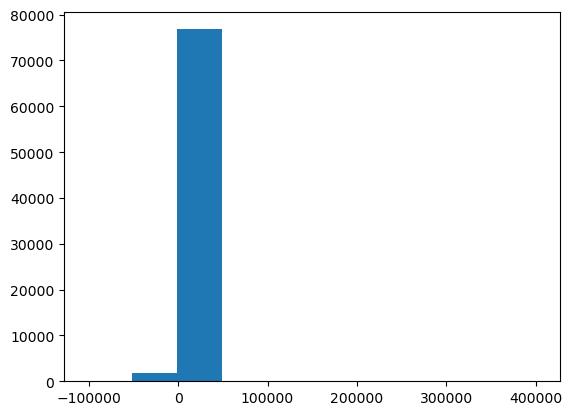

total_revenue 


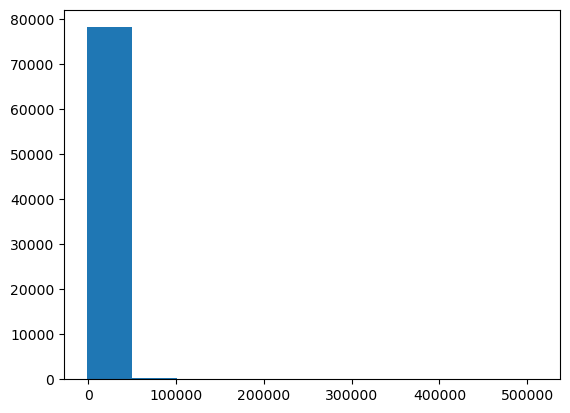

total_liabilities 


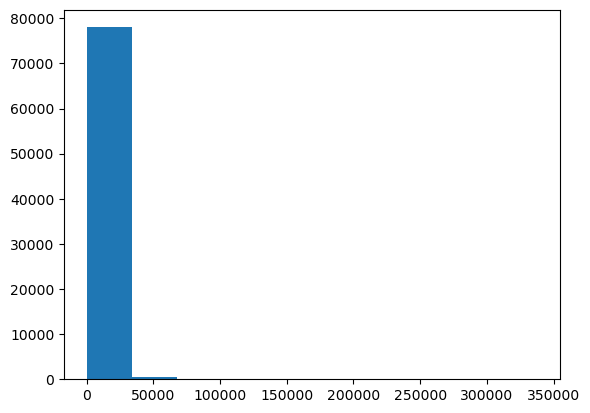

total_operating_expenses


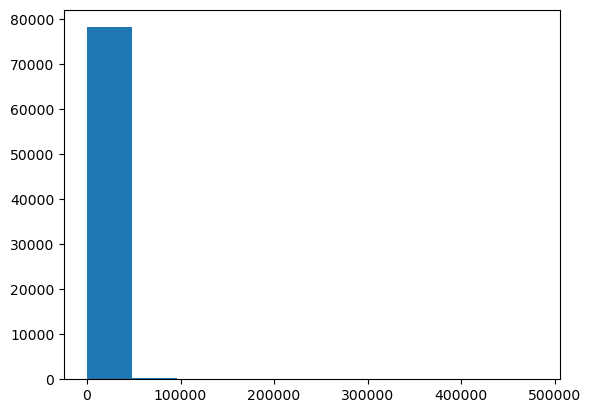

In [13]:
# perform a plot distribution of all the features
for col in num_cols:
    print(col)
    plt.hist(df[col])
    plt.show()

In [14]:
w.nulls_by_col(df)

,num_rows_missing,percent_rows_missing
company_name,0,0.0
status_label,0,0.0
year,0,0.0
current_assets,0,0.0
cost_of_goods_sold,0,0.0
depreciation_and_amortization,0,0.0
ebitda,0,0.0
inventory,0,0.0
net_income,0,0.0
total_receivables,0,0.0


In [15]:
# w.execute_outlier(df)

train_size = 0.70 
n = df.shape[0] 
test_start_index = round(train_size * n)

train = df.iloc[:test_start_index] 
test = df.iloc[test_start_index:] 

plt.plot(train.w)
plt.plot(test.w)
plt.title('Teams wins over time')
plt.show()

y = train.w
y.head()

train.w.plot.hist()
plt.title('distribution of Wins')
plt.show()

train.groupby(train.index.month).w.mean()\
.plot.bar().tick_params('x', rotation=0)

plt.title('mean Wins by month')
plt.show()

def execute_outlier(df):
    # total rows
    orig_shape = df.shape[0]
    
    
    # finding the lower and upper bound outliers for fixed acidity
    col1UP, col1LOW = outlier(df,'col1')
    df = df[(df.col1 < col1UP) & (df.col1 > col1LOW)]
    col1 = df.shape[0]

    
    # finding the lower and upper bound outliers for col2
    col2UP, col2LOW = outlier(df,'col2')
    df = df[(df.col2 < col2UP) & (df.col2 > col2LOW)]
    col2 = df.shape[0]


    # finding the lower and upper bound outliers for col3
    col3UP, col3LOW = outlier(df,'col3')
    df = df[(df.col3 < col3UP) & (df.col3 > col3LOW)]
    col3 = df.shape[0]


    # finding the lower and upper bound outliers for col4
    res_sugUP, res_sugLOW = outlier(df,'col4')
    df = df[(df.col4 < res_sugUP) & (df.col4 > res_sugLOW)]
    col4 = df.shape[0]


    # finding the lower and upper bound outliers for chlorides
    chloUP, chloLOW = outlier(df,'chlorides')
    df = df[(df.chlorides < chloUP) & (df.chlorides > chloLOW)]
    col5 = df.shape[0]


    # finding the lower and upper bound outliers for free_sulfur_dioxide
    fsdUP, fsdLOW = outlier(df,'free_sulfur_dioxide')
    df = df[(df.free_sulfur_dioxide < fsdUP) & (df.free_sulfur_dioxide > fsdLOW)]
    col6 = df.shape[0]


    # finding the lower and upper bound outliers for total_sulfur_dioxide
    tsdUP, tsdLOW = outlier(df,'total_sulfur_dioxide')
    df = df[(df.total_sulfur_dioxide < tsdUP) & (df.total_sulfur_dioxide > tsdLOW)]
    col7 = df.shape[0]


    # finding the lower and upper bound outliers for density
    denUP, denLOW = outlier(df,'density')
    df = df[(df.density < denUP) & (df.density > denLOW)]
    col8 = df.shape[0]


    # finding the lower and upper bound outliers for ph
    phUP, phLOW = outlier(df,'ph')
    df = df[(df.ph < phUP) & (df.ph > phLOW)]
    col9 = df.shape[0]


    # finding the lower and upper bound outliers for sulphates
    sulUP, sulLOW = outlier(df,'sulphates')
    df = df[(df.sulphates < sulUP) & (df.sulphates > sulLOW)]
    col10 = df.shape[0]


    # finding the lower and upper bound outliers for alcohol
    alcUP, alcLOW = outlier(df,'alcohol')
    df = df[(df.alcohol < alcUP) & (df.alcohol > alcLOW)]
    col11 = df.shape[0]

    
    # print('Handaling OUTLIERS')
    # print(f"col1: lower= {col1LOW}, upper= {col1UP}, new rows= {col1}\n")
    # print(f"col2: lower= {col2LOW}, upper= {col2UP}, new rows= {col2}\n")
    # print(f"col3: lower= {col3LOW}, upper= {col3UP}, new rows= {col3}\n")
    # print(f"col4: lower= {res_sugLOW}, upper= {res_sugUP}, new rows= {col4}\n")
    # print(f"chlorides: lower= {chloLOW}, upper= {chloUP}, new rows= {col5}\n")
    # print(f"free_sulfur_dioxide: lower= {fsdLOW}, upper= {fsdUP}, new rows= {col6}\n")    
    # print(f"total_sulfur_dioxide: lower= {tsdLOW}, upper= {tsdUP}, new rows= {col7}\n")    
    # print(f"density: lower= {denLOW}, upper= {denUP}, new rows= {col8}\n")    
    # print(f"ph: lower= {phLOW}, upper= {phUP}, new rows= {col9}\n")    
    # print(f"sulphates: lower= {sulLOW}, upper= {sulUP}, new rows= {col10}\n")    
    # print(f"alcohol: lower= {alcLOW}, upper= {alcUP}, new rows= {col11}\n")
    

    new_shape = df.shape[0]
    shape_rem = orig_shape-new_shape
    print(f"Total of rows originally: {orig_shape}")
    print(f"Total of rows removed: {shape_rem}")
    print(f"New total of rows: {new_shape}")
    
    return df

In [16]:
list(df.columns)

['company_name',
 'status_label',
 'year',
 'current_assets',
 'cost_of_goods_sold',
 'depreciation_and_amortization',
 'ebitda',
 'inventory',
 'net_income',
 'total_receivables',
 'market_value ',
 'net_sales',
 'total_assets',
 'total_long_term_debt',
 'ebit',
 'gross_profit',
 'total_current_liabilities',
 'retained_earnings',
 'total_revenue ',
 'total_liabilities ',
 'total_operating_expenses']

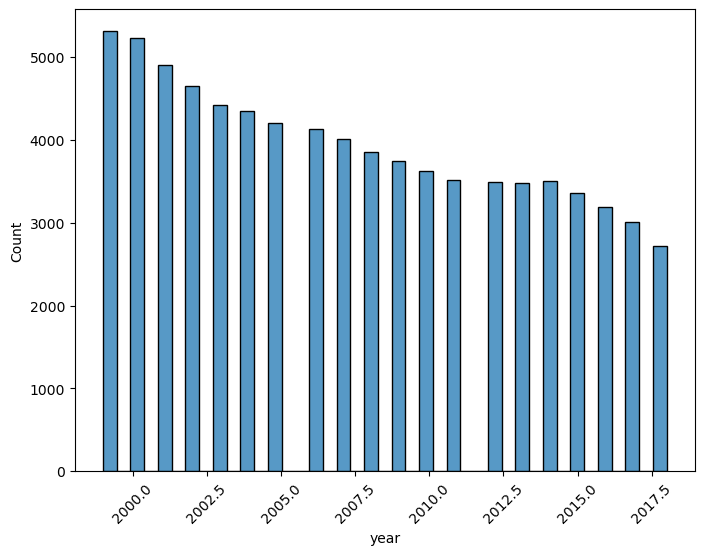

In [17]:
plt.figure(figsize=(8,6))
plt.xticks(rotation = 45)
sns.histplot(df['year'])
plt.show()

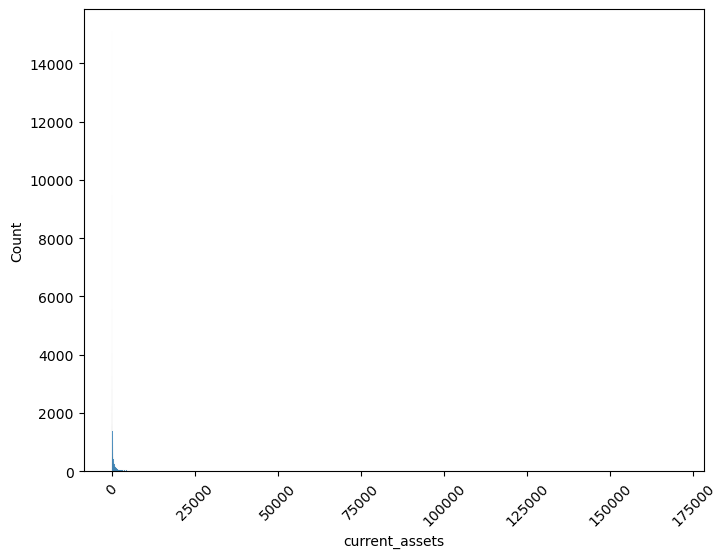

In [18]:
plt.figure(figsize=(8,6))
plt.xticks(rotation = 45)
sns.histplot(df['current_assets'])
plt.show()

In [19]:
# lower, upper = w.outlier(df, 'current_assets', m=2)

In [20]:
q3 = df['current_assets'].quantile(.75)
q3

431.52675

In [21]:
# df[(df['current_assets'] > upper)]

In [22]:
dfo = df[(df['current_assets'] < q3)]

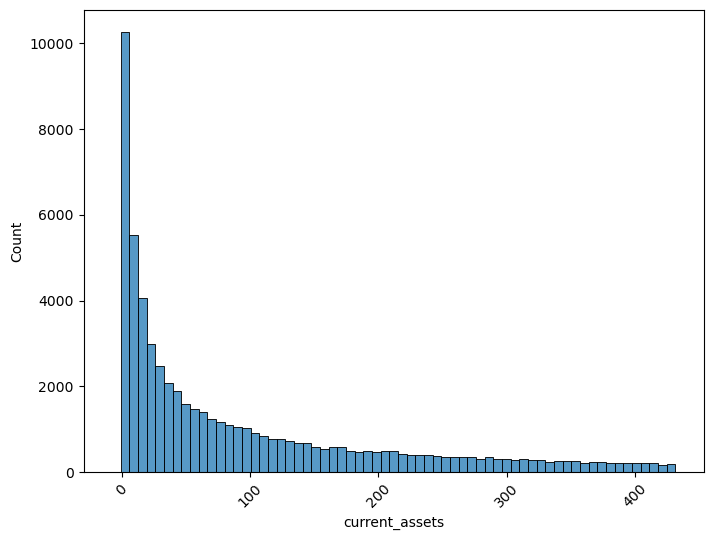

In [23]:
plt.figure(figsize=(8,6))
plt.xticks(rotation = 45)
sns.histplot(dfo['current_assets'])
plt.show()

In [24]:
dfo.current_assets.value_counts()

0.002      31
0.001      30
0.003      28
0.015      21
0.014      19
           ..
7.682       1
4.760       1
2.497       1
110.073     1
82.589      1
Name: current_assets, Length: 47264, dtype: int64

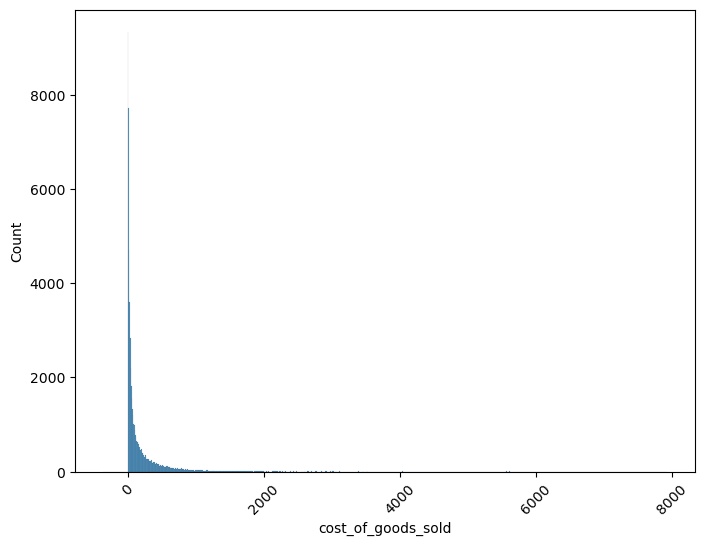

In [25]:
plt.figure(figsize=(8,6))
plt.xticks(rotation = 45)
sns.histplot(dfo['cost_of_goods_sold'])
plt.show()

In [26]:
q3 = dfo['cost_of_goods_sold'].quantile(.75)
q3

177.2955

In [27]:
dfo = dfo[(dfo['cost_of_goods_sold'] < q3)]

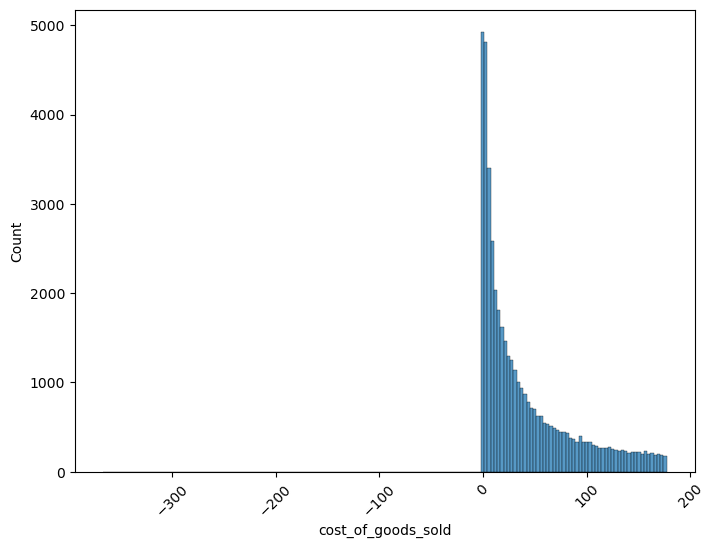

In [28]:
plt.figure(figsize=(8,6))
plt.xticks(rotation = 45)
sns.histplot(dfo['cost_of_goods_sold'])
plt.show()

In [29]:
# plt.figure(figsize=(14,14))
# plt.xticks(rotation = 45)
# for i, col in enumerate(df):
#     plt.subplot(6,4,i+1)
#     sns.histplot(df[col])
# plt.show()

In [30]:
# year = num_cols.pop(0)
# columns = num_cols
# dfo = df
# # total rows
# orig_shape = dfo.shape[0]

# for i in columns:
    
#     # finding the lower and upper bound outliers for fixed acidity
#     col1UP, col1LOW = w.outlier(dfo,i,2.5)
#     dfo = dfo[(dfo[i] < col1UP)]
#     col1 = dfo.shape[0]

#     print(f"{i}: upper= {col1UP}, new rows= {col1}\n")
    
# new_shape = dfo.shape[0]
# shape_rem = orig_shape-new_shape
# print(f"Total of rows originally: {orig_shape}")
# print(f"Total of rows removed: {shape_rem}")
# print(f"New total of rows: {new_shape}")

In [31]:
# year = num_cols.pop(0)
# columns = num_cols
# dfo = df
# # total rows
# orig_shape = dfo.shape[0]

# for i in columns:
    
#     # finding the lower and upper bound outliers for fixed acidity
#     col1UP, col1LOW = w.outlier(dfo,i,2.5)
#     dfo = dfo[(dfo[i] < col1UP) & (dfo[i] > col1LOW)]
#     col1 = dfo.shape[0]

#     print(f"{i}: lower= {col1LOW}, upper= {col1UP}, new rows= {col1}\n")
    
# new_shape = dfo.shape[0]
# shape_rem = orig_shape-new_shape
# print(f"Total of rows originally: {orig_shape}")
# print(f"Total of rows removed: {shape_rem}")
# print(f"New total of rows: {new_shape}")

In [32]:
# dfo.columns

In [33]:
# # perform a plot distribution of all the features
# for col in list(dfo.columns)[2:]:                           
#     print(col)
#     plt.boxplot(dfo[col])
#     plt.show()

In [34]:
# # perform a plot distribution of all the features
# for col in dfo.columns:
#     print(col)
#     plt.hist(dfo[col])
#     plt.show()